In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
X = np.linspace(-5, 5, 1000)
y = np.sin(X) + np.random.randn(X.shape[0]) * 0.3

In [3]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

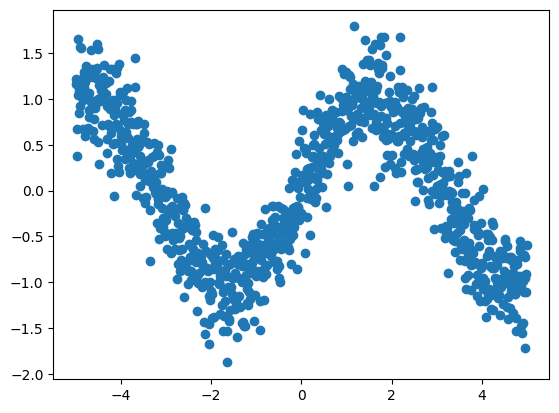

In [4]:
plt.scatter(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def rmse(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred) ** 2)) / y_true.shape[0]

In [7]:
class Model:

    def __init__(self, in_features: int, hidden_size: int, out_features: int):
        self.in_features = in_features
        self.hidden_size = hidden_size
        self.out_features = out_features

        self.w1 = np.random.randn(in_features, hidden_size)
        self.w2 = np.random.randn(hidden_size, out_features)

    def forward(self, x):
        self.z1 = x @ self.w1 # (B x in_features) @ (in_features x hidden_size) = (B x hidden_size)
        self.a1 = sigmoid(self.z1) # (B x hidden_size)
        self.z2 = self.a1 @ self.w2 # (B x hidden_size) @ (hidden_size x out_features) = (B x out_features)
        return self.z2

    def backward(self, x, y_true, y_pred, alpha):
        dz2 = - 2 / y_true.shape[0] * (y_true - y_pred)
        dw2 = self.a1.T @ dz2

        da1 = dz2 @ self.w2.T
        dz1 = da1 * sigmoid(self.z1) * (1 - sigmoid(self.z1))
        dw1 = x.T @ dz1

        self.w1 -= alpha * dw1
        self.w2 -= alpha * dw2

In [15]:
def train_model(model, X_train, y_train, X_test, y_test, lr=0.01, epochs=1000):
    train_losses, val_losses = [], []
    for epoch in tqdm(range(epochs)):
        y_train_pred = model.forward(X_train)
        model.backward(X_train, y_train, y_train_pred, alpha=lr)

        train_loss = rmse(y_train, model.forward(X_train))
        val_loss = rmse(y_test, model.forward(X_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if epoch % 50 == 0:
            clear_output(wait=True)
            plt.figure(figsize=(7,5))
            plt.scatter(X_test, y_test, label="test")
            plt.scatter(X_test, model.forward(X_test), label="predict")
            plt.scatter(X_test, np.sin(X_test), label="real")
            plt.legend()
            plt.show()

    return train_losses, val_losses

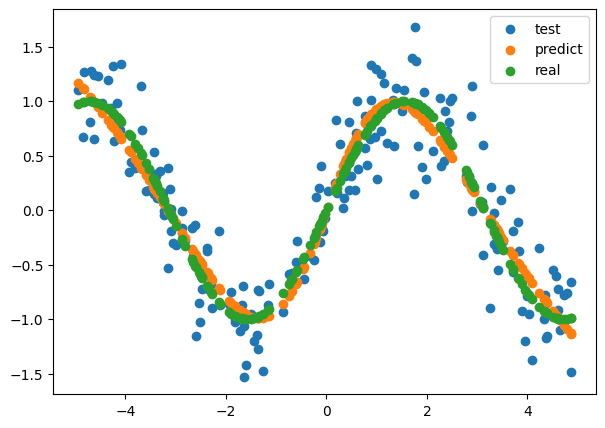

100%|██████████| 3000/3000 [00:16<00:00, 181.41it/s]


In [19]:
nn_model = Model(X.shape[1], 32, y.shape[1])
train_losses, val_losses = train_model(nn_model, X_train, y_train, X_test, y_test, lr=0.005, epochs=3000)

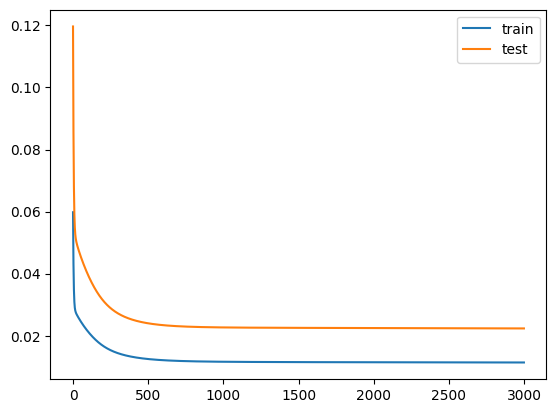

In [17]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='test')
plt.legend()